In [1]:
# 导包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell # 这个对象设置所有行全部输出
  
# 导入威斯康辛州女性乳腺癌患病检测数据集
from sklearn.datasets import load_breast_cancer

# 导入数据集划分工具
from sklearn.model_selection import train_test_split

# 导入KNN分类器对象
from sklearn.neighbors import KNeighborsClassifier

# 设置该对象ast_node_interactivity的属性值为all，表示notebook下每一行有输出的代码全部输出运算结果
InteractiveShell.ast_node_interactivity = "all"

# 解决坐标轴刻度负号乱码
plt.rcParams['axes.unicode_minus'] = False

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Simhei']
plt.style.use('ggplot')



In [2]:
# 归一化实现：原生Python代码实现

# 准备数据
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
data = pd.DataFrame(data)
data

,0,1
0,-1.0,2
1,-0.5,6
2,0.0,10
3,1.0,18


In [3]:
# 手写归一化算法
Min_Max_Scaler_Data = (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))
Min_Max_Scaler_Data

,0,1
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,1.00,1.00


In [4]:
# sklearn提供归一化API实现威斯康辛州女性乳腺癌患病检测的完整模型

# 导入交叉验证API
from sklearn.model_selection import cross_val_score as cvs

# 导入归一化算法
from sklearn.preprocessing import MinMaxScaler 

In [5]:
# 加载数据，并进行简单的数据探索
dataset = load_breast_cancer()
x = dataset.data
y = dataset.target
pd.DataFrame(x, columns=dataset.feature_names)
pd.DataFrame(y)
x.shape

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


(569, 30)

In [6]:
# 划分训练集和数据集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.3, random_state=123)

In [7]:
# 第一种方案：先直接将训练集和测试集都完成归一化操作

train_df_mms = MinMaxScaler()
test_df_mms = MinMaxScaler()

pd.DataFrame(Xtrain)

# MinMaxScaler对象与sklearn封装的其余算法对象所提供的方法是一致的
# fit：输入指定的数据集，对该数据集进行归一化操作
# transform：转换操作，返回最终完成归一化操作的数据集
# 这两个方法，一先一后的操作，所以单独在提供一个整体的API
# fit_transform；直接输入数据集，完成归一化操作后返回归一化之后的数据集
train_df_mms_1 = train_df_mms.fit_transform(Xtrain)
test_df_mms_1 = test_df_mms.fit_transform(Xtest)

pd.DataFrame(train_df_mms_1)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,12.48,37.16,82.28,474.2,0.12980,0.2517,0.36300,0.09653,0.2112,0.08732
1,13.77,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,0.1592,0.05912,...,14.67,16.93,94.17,661.1,0.11700,0.1072,0.03732,0.05802,0.2823,0.06794
2,17.19,22.07,111.60,928.3,0.09726,0.08995,0.09061,0.06527,0.1867,0.05580,...,21.58,29.33,140.50,1436.0,0.15580,0.2567,0.38890,0.19840,0.3216,0.07570
3,13.85,17.21,88.44,588.7,0.08785,0.06136,0.01420,0.01141,0.1614,0.05890,...,15.49,23.58,100.30,725.9,0.11570,0.1350,0.08115,0.05104,0.2364,0.07182
4,19.16,26.60,126.20,1138.0,0.10200,0.14530,0.19210,0.09664,0.1902,0.06220,...,23.72,35.90,159.80,1724.0,0.17820,0.3841,0.57540,0.18720,0.3258,0.09720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,11.60,12.84,74.34,412.6,0.08983,0.07525,0.04196,0.03350,0.1620,0.06582,...,13.06,17.16,82.96,512.5,0.14310,0.1851,0.19220,0.08449,0.2772,0.08756
394,12.86,13.32,82.82,504.8,0.11340,0.08834,0.03800,0.03400,0.1543,0.06476,...,14.04,21.08,92.80,599.5,0.15470,0.2231,0.17910,0.11550,0.2382,0.08553
395,12.05,22.72,78.75,447.8,0.06935,0.10730,0.07943,0.02978,0.1203,0.06659,...,12.57,28.71,87.36,488.4,0.08799,0.3214,0.29120,0.10920,0.2191,0.09349
396,20.44,21.78,133.80,1293.0,0.09150,0.11310,0.09799,0.07785,0.1618,0.05557,...,24.31,26.37,161.20,1780.0,0.13270,0.2376,0.27020,0.17650,0.2609,0.06735


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.193573,0.468858,0.191394,0.100017,0.360928,0.237065,0.260544,0.204026,0.165657,0.331508,...,0.138952,0.665857,0.141274,0.062177,0.330012,0.232979,0.289936,0.331718,0.107826,0.273652
1,0.308125,0.100000,0.288819,0.176907,0.355241,0.111979,0.024906,0.095278,0.268687,0.192923,...,0.218990,0.119838,0.201718,0.108550,0.237600,0.071460,0.029808,0.199381,0.247979,0.109359
2,0.481474,0.404498,0.458195,0.325195,0.402907,0.198965,0.212301,0.324404,0.407576,0.122999,...,0.471530,0.454521,0.437243,0.300814,0.517724,0.238568,0.310623,0.681787,0.325448,0.175144
3,0.312180,0.236332,0.291553,0.179482,0.317956,0.109313,0.033271,0.056710,0.279798,0.188290,...,0.248958,0.299325,0.232881,0.124628,0.228215,0.102534,0.064816,0.175395,0.157500,0.142252
4,0.581327,0.561246,0.563247,0.415172,0.445698,0.372531,0.450094,0.480318,0.425253,0.257793,...,0.549741,0.631849,0.535357,0.372271,0.679446,0.380973,0.459585,0.643299,0.333728,0.357409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.198135,0.085121,0.190099,0.103922,0.335831,0.152869,0.098313,0.166501,0.282828,0.334035,...,0.160149,0.126046,0.144731,0.071680,0.426034,0.158535,0.153514,0.290344,0.237926,0.275687
394,0.262000,0.101730,0.251115,0.143482,0.548614,0.193917,0.089035,0.168986,0.243939,0.311710,...,0.195965,0.231849,0.194754,0.093266,0.509783,0.201010,0.143051,0.396907,0.161049,0.258477
395,0.220944,0.426990,0.221830,0.119025,0.150943,0.253371,0.186106,0.148012,0.072222,0.350253,...,0.142241,0.437787,0.167099,0.065701,0.028157,0.310888,0.232588,0.375258,0.123398,0.325958
396,0.646206,0.394464,0.617931,0.481679,0.350907,0.271558,0.229592,0.386928,0.281818,0.118155,...,0.571303,0.374629,0.542474,0.386165,0.350949,0.217218,0.215815,0.606529,0.205795,0.104357


In [14]:
# 绘制带有K折交叉验证的超参数学习曲线对超参数K进行调优，求解出其局部最优解
from sklearn.model_selection import cross_val_score

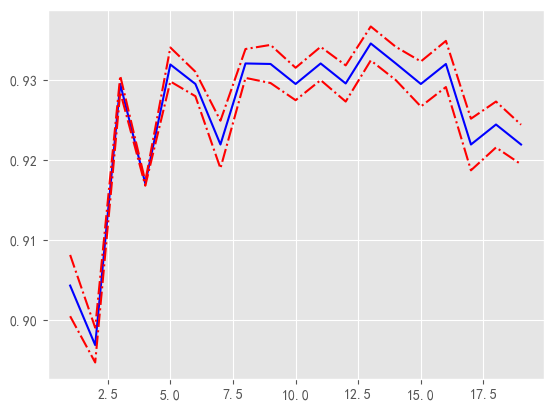

In [19]:
# 准备保存K折交叉验证评分结果的数组
scores_1 = []
scores_2 = []

#  准备保存K折交叉验证的评分方差的结果的数据
var_1 = []
var_2 = []

k_range = range(1, 20)

# iter
for i in k_range:
  
  # 构建KNN分类模型
  clf = KNeighborsClassifier(n_neighbors = i)
  
  # 完成指定一次10折交叉验证，伴随交叉验证会完成10次模型训练和评估，求得10折交叉验证时模型的评分的均值，保存在scores数组
  cvs_1 = cross_val_score(clf, Xtrain, Ytrain, cv=10)
  cvs_2 = cross_val_score(clf, train_df_mms_1, Ytrain, cv=10)
  
  
  # 保存评分的均值
  scores_1.append(cvs_1.mean())
  scores_2.append(cvs_2.mean())
  
  # 保存评分的方差
  var_1.append(cvs_1.var())
  var_2.append(cvs_2.var())
  

# 绘制带有K折交叉验证的超参数学习曲线，并使用二倍放大的方差给各轮评分的均值相对其评分均值的偏离程度
plt.plot(k_range, scores_1, color = 'blue')

# 绘制带有正负二倍方差的评分均值的曲线
plt.plot(k_range, np.array(scores_1) + np.array(var_1) * 2, color = 'red', linestyle = '-.')
plt.plot(k_range, np.array(scores_1) - np.array(var_1) * 2, color = 'red', linestyle = '-.')

  



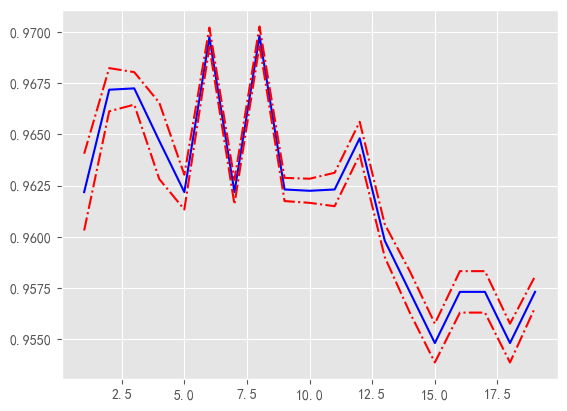

In [20]:
# 绘制带有K折交叉验证的超参数学习曲线，并使用二倍放大的方差给各轮评分的均值相对其评分均值的偏离程度
plt.plot(k_range, scores_2, color = 'blue')

# 绘制带有正负二倍方差的评分均值的曲线
plt.plot(k_range, np.array(scores_2) + np.array(var_2) * 2, color = 'red', linestyle = '-.')
plt.plot(k_range, np.array(scores_2) - np.array(var_2) * 2, color = 'red', linestyle = '-.')

In [21]:
# 下一步验证：验证两种不同模型（输入了未执行归一化的训练集所构建的模型和输入了已执行归一化训练集在未进行归一化的测试集的表现以及在以进行归一化测试集的表现）
Xtrain
test_df_mms_1

Xtrain
train_df_mms_1

array([[1.151e+01, 2.393e+01, 7.452e+01, ..., 9.653e-02, 2.112e-01,
        8.732e-02],
       [1.377e+01, 1.327e+01, 8.806e+01, ..., 5.802e-02, 2.823e-01,
        6.794e-02],
       [1.719e+01, 2.207e+01, 1.116e+02, ..., 1.984e-01, 3.216e-01,
        7.570e-02],
       ...,
       [1.205e+01, 2.272e+01, 7.875e+01, ..., 1.092e-01, 2.191e-01,
        9.349e-02],
       [2.044e+01, 2.178e+01, 1.338e+02, ..., 1.765e-01, 2.609e-01,
        6.735e-02],
       [1.174e+01, 1.469e+01, 7.631e+01, ..., 1.056e-01, 2.604e-01,
        9.879e-02]])

array([[0.20204458, 0.25893769, 0.19065718, ..., 0.05742336, 0.33172257,
        0.12433498],
       [0.13067348, 0.30439224, 0.1223827 , ..., 0.17771271, 0.33911313,
        0.17405583],
       [0.49973969, 0.49080695, 0.49277866, ..., 0.66792973, 0.36384309,
        0.15382594],
       ...,
       [0.57215202, 0.7711951 , 0.58399558, ..., 0.85876679, 0.8590108 ,
        0.31888342],
       [0.62468645, 0.5020429 , 0.62200263, ..., 0.748536  , 0.39340534,
        0.16748768],
       [0.18784609, 0.59448417, 0.19425057, ..., 0.49052704, 0.37407618,
        0.26804598]])

array([[1.151e+01, 2.393e+01, 7.452e+01, ..., 9.653e-02, 2.112e-01,
        8.732e-02],
       [1.377e+01, 1.327e+01, 8.806e+01, ..., 5.802e-02, 2.823e-01,
        6.794e-02],
       [1.719e+01, 2.207e+01, 1.116e+02, ..., 1.984e-01, 3.216e-01,
        7.570e-02],
       ...,
       [1.205e+01, 2.272e+01, 7.875e+01, ..., 1.092e-01, 2.191e-01,
        9.349e-02],
       [2.044e+01, 2.178e+01, 1.338e+02, ..., 1.765e-01, 2.609e-01,
        6.735e-02],
       [1.174e+01, 1.469e+01, 7.631e+01, ..., 1.056e-01, 2.604e-01,
        9.879e-02]])

array([[0.19357291, 0.46885813, 0.19139445, ..., 0.33171821, 0.10782574,
        0.27365209],
       [0.3081251 , 0.1       , 0.28881854, ..., 0.19938144, 0.2479795 ,
        0.1093591 ],
       [0.48147397, 0.40449827, 0.45819542, ..., 0.68178694, 0.32544845,
        0.17514412],
       ...,
       [0.22094379, 0.42698962, 0.22183048, ..., 0.37525773, 0.12339838,
        0.32595795],
       [0.64620609, 0.39446367, 0.61793064, ..., 0.60652921, 0.20579539,
        0.10435741],
       [0.20523088, 0.14913495, 0.204274  , ..., 0.3628866 , 0.20480978,
        0.37088844]])

In [27]:
# 构建KNN分类器模型
clf = KNeighborsClassifier()

# 输入未进行归一化的训练集模型
clf_1 = clf.fit(Xtrain, Ytrain)

# 输入未进行归一化的测试集训练模型
y_pred_1 = clf_1.predict(Xtest)

# 导入准确率评估指标
from sklearn.metrics import accuracy_score
print('在未进行归一化的训练集上训练得到的，将其在未进行归一化的测试集上验证模型的准确率为：{}'.format(accuracy_score(y_pred_1, Ytest)))

# 输入已进行归一化的测试集训练模型
y_pred_2 = clf_1.predict(test_df_mms_1)
print('在未进行归一化的训练集上训练得到的，将其在已进行归一化的测试集上验证模型的准确率为：{}'.format(accuracy_score(y_pred_2, Ytest)))

# 输入已进行归一化的训练集模型
clf_2 = clf.fit(train_df_mms_1, Ytrain)

# 输入未进行归一化的测试集训练模型
y_pred_3 = clf_2.predict(Xtest)
print('在已进行归一化的训练集上训练得到的，将其在未进行归一化的测试集上验证模型的准确率为：{}'.format(accuracy_score(y_pred_3, Ytest)))

# 输入已进行归一化的测试集训练模型
y_pred_4 = clf_2.predict(test_df_mms_1)
print('在已进行归一化的训练集上训练得到的，将其在已进行归一化的测试集上验证模型的准确率为：{}'.format(accuracy_score(y_pred_4, Ytest)))




在未进行归一化的训练集上训练得到的，将其在未进行归一化的测试集上验证模型的准确率为：0.9298245614035088
在未进行归一化的训练集上训练得到的，将其在已进行归一化的测试集上验证模型的准确率为：0.6023391812865497
在已进行归一化的训练集上训练得到的，将其在未进行归一化的测试集上验证模型的准确率为：0.39766081871345027
在已进行归一化的训练集上训练得到的，将其在已进行归一化的测试集上验证模型的准确率为：0.9532163742690059
